In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import os
from code import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
DATA_PATH="./data_init/"

def get_labels(path=DATA_PATH):
    labels=os.listdir(path)
    label_indices=np.arange(0,len(labels))
    return labels, label_indices, to_categorical(label_indices)

In [3]:
def speech2mfcc(file_path,max_len=11):
    wave, sr= librosa.load(file_path, mono=True, sr=None)
    wave=wave[::5]
    mfcc=librosa.feature.mfcc(wave,sr=16000)
    if (max_len > mfcc.shape[1]): #.shape[1], 1-->column
        pad_width=max_len-mfcc.shape[1]
        mfcc=np.pad(mfcc,pad_width=((0,0),(0,pad_width)),mode='constant')
    else:
        mfcc=mfcc[:,:max_len]
    return mfcc

In [4]:
def save_data_to_array(path=DATA_PATH, max_len=11):
    labels,_,_=get_labels(path)

    for label in labels:
        mfcc_vectors=[]

        speechfiles=[path + label + '/' + speech for speech in os.listdir(path+'/'+label)]
        for speech in tqdm(speechfiles,"Saving vectors to label -'{}'".format(label)):
            mfcc=speech2mfcc(speech,max_len=max_len)
            print(mfcc.shape)
            mfcc_vectors.append(mfcc)
            
        np.save(label+'.npy',mfcc_vectors)

In [5]:
def get_train_test(split_ratio=0.8,random_state=42):
    labels,indices,_=get_labels(DATA_PATH)

    X=np.load(labels[0]+'.npy')
    y=np.zeros(X.shape[0])

    for i,label in enumerate(labels[1:]):
        x=np.load(label+'.npy')
        X=np.vstack((X,x))
        y=np.append(y,np.full(x.shape[0],fill_value=(i+1)))
    assert X.shape[0] == len(y)
    return train_test_split(X,y,test_size=(1-split_ratio),random_state=random_state,shuffle=True)

In [57]:
#save_data_to_array()

Saving vectors to label -'1':  85%|████████▍ | 22/26 [00:00<00:00, 97.05it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':   8%|▊         | 2/26 [00:00<00:01, 17.46it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  35%|███▍      | 9/26 [00:00<00:00, 22.63it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10':  69%|██████▉   | 18/26 [00:00<00:00, 28.94it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'10': 100%|██████████| 26/26 [00:00<00:00, 31.14it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)



Saving vectors to label -'2':  31%|███       | 8/26 [00:00<00:00, 31.68it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  46%|████▌     | 12/26 [00:00<00:00, 32.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'2':  85%|████████▍ | 22/26 [00:00<00:00, 36.72it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  12%|█▏        | 3/26 [00:00<00:00, 28.26it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  38%|███▊      | 10/26 [00:00<00:00, 31.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  69%|██████▉   | 18/26 [00:00<00:00, 33.59it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'3':  81%|████████  | 21/26 [00:00<00:00, 24.87it/s]

(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  23%|██▎       | 6/26 [00:00<00:00, 25.98it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  65%|██████▌   | 17/26 [00:00<00:00, 32.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'4':  81%|████████  | 21/26 [00:00<00:00, 33.80it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  12%|█▏        | 3/26 [00:00<00:01, 22.76it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  38%|███▊      | 10/26 [00:00<00:00, 26.62it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'5':  73%|███████▎  | 19/26 [00:00<00:00, 31.88it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  35%|███▍      | 9/26 [00:00<00:00, 31.56it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  58%|█████▊    | 15/26 [00:00<00:00, 33.91it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'6':  92%|█████████▏| 24/26 [00:00<00:00, 33.67it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  12%|█▏        | 3/26 [00:00<00:00, 24.73it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  23%|██▎       | 6/26 [00:00<00:00, 24.16it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'7':  62%|██████▏   | 16/26 [00:00<00:00, 30.85it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':   0%|          | 0/26 [00:00<?, ?it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  23%|██▎       | 6/26 [00:00<00:00, 21.33it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  58%|█████▊    | 15/26 [00:00<00:00, 27.69it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'8':  92%|█████████▏| 24/26 [00:00<00:00, 32.39it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  12%|█▏        | 3/26 [00:00<00:00, 29.27it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9':  54%|█████▍    | 14/26 [00:00<00:00, 35.75it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


Saving vectors to label -'9': 100%|██████████| 26/26 [00:00<00:00, 42.93it/s]

(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)
(20, 11)


In [6]:
X_train, X_test, y_train, y_test=get_train_test()
X_train=X_train.reshape(X_train.shape[0],20,11,1)
X_test=X_test.reshape(X_test.shape[0],20,11,1)
y_train_hot=to_categorical(y_train)
y_test_hot=to_categorical(y_test)

In [13]:
seed=0

In [14]:
weights_4=[]
weights_6=[]   

for step in np.arange(1,30,1):
    
    np.random.seed(seed)
    
    model=Sequential()
    model.add(Conv2D(64,kernel_size=(2,2),activation='tanh',input_shape=(20,11,1)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.4))
    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10,activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
    model.fit(X_train,y_train_hot,batch_size=128,epochs=step,verbose=1)
        
    weights_4=np.append(weights_4,model.layers[4].get_weights()[0])
    weights_6=np.append(weights_6,model.layers[6].get_weights()[0])
    
    if step==1:
        diff_4=[]
        diff_6=[]
    else:
        diff4=np.absolute(weights_4[step]-weights_4[step-1])
        diff6=np.absolute(weights_6[step]-weights_6[step-1])
        
        diff_4=np.append(diff_4,diff4)
        diff_6=np.append(diff_6,diff6)

Epoch 1/1
208/208 [==============================] - 3s 14ms/step - loss: 3.2605 - acc: 0.0962
Epoch 1/2
208/208 [==============================] - 2s 9ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/2
208/208 [==============================] - 0s 619us/step - loss: 2.3406 - acc: 0.3029
Epoch 1/3
208/208 [==============================] - 2s 9ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/3
208/208 [==============================] - 0s 541us/step - loss: 2.3406 - acc: 0.3029
Epoch 3/3
208/208 [==============================] - 0s 523us/step - loss: 1.7144 - acc: 0.3942
Epoch 1/4
208/208 [==============================] - 2s 9ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/4
208/208 [==============================] - 0s 563us/step - loss: 2.3406 - acc: 0.3029
Epoch 3/4
208/208 [==============================] - 0s 593us/step - loss: 1.7144 - acc: 0.3942
Epoch 4/4
208/208 [==============================] - 0s 539us/step - loss: 1.5453 - acc: 0.4279
Epoch 1/5
208/208 [============================

208/208 [==============================] - 0s 521us/step - loss: 0.9788 - acc: 0.6346
Epoch 9/13
208/208 [==============================] - 0s 534us/step - loss: 0.9346 - acc: 0.6875
Epoch 10/13
208/208 [==============================] - 0s 467us/step - loss: 0.8187 - acc: 0.7740
Epoch 11/13
208/208 [==============================] - 0s 485us/step - loss: 0.7353 - acc: 0.7596
Epoch 12/13
208/208 [==============================] - 0s 482us/step - loss: 0.7850 - acc: 0.7356
Epoch 13/13
208/208 [==============================] - 0s 470us/step - loss: 0.5560 - acc: 0.7933
Epoch 1/14
208/208 [==============================] - 2s 10ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/14
208/208 [==============================] - 0s 507us/step - loss: 2.3406 - acc: 0.3029
Epoch 3/14
208/208 [==============================] - 0s 538us/step - loss: 1.7144 - acc: 0.3942
Epoch 4/14
208/208 [==============================] - 0s 481us/step - loss: 1.5453 - acc: 0.4279
Epoch 5/14
208/208 [==================

208/208 [==============================] - 0s 646us/step - loss: 0.5663 - acc: 0.7981
Epoch 18/18
208/208 [==============================] - 0s 530us/step - loss: 0.4799 - acc: 0.8413
Epoch 1/19
208/208 [==============================] - 2s 12ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/19
208/208 [==============================] - 0s 486us/step - loss: 2.3406 - acc: 0.3029
Epoch 3/19
208/208 [==============================] - 0s 508us/step - loss: 1.7144 - acc: 0.3942
Epoch 4/19
208/208 [==============================] - 0s 535us/step - loss: 1.5453 - acc: 0.4279
Epoch 5/19
208/208 [==============================] - 0s 532us/step - loss: 1.5569 - acc: 0.5096
Epoch 6/19
208/208 [==============================] - 0s 556us/step - loss: 1.1925 - acc: 0.5721
Epoch 7/19
208/208 [==============================] - 0s 569us/step - loss: 1.2983 - acc: 0.5625
Epoch 8/19
208/208 [==============================] - 0s 566us/step - loss: 1.0205 - acc: 0.6346
Epoch 9/19
208/208 [=====================

208/208 [==============================] - 3s 13ms/step - loss: 3.2605 - acc: 0.0962
Epoch 2/23
208/208 [==============================] - 0s 482us/step - loss: 2.3406 - acc: 0.3029
Epoch 3/23
208/208 [==============================] - 0s 493us/step - loss: 1.7144 - acc: 0.3942
Epoch 4/23
208/208 [==============================] - 0s 494us/step - loss: 1.5453 - acc: 0.4279
Epoch 5/23
208/208 [==============================] - 0s 495us/step - loss: 1.5589 - acc: 0.5096
Epoch 6/23
208/208 [==============================] - 0s 479us/step - loss: 1.1923 - acc: 0.5817
Epoch 7/23
208/208 [==============================] - 0s 495us/step - loss: 1.3101 - acc: 0.5577
Epoch 8/23
208/208 [==============================] - 0s 468us/step - loss: 0.9788 - acc: 0.6346
Epoch 9/23
208/208 [==============================] - 0s 501us/step - loss: 0.9346 - acc: 0.6875
Epoch 10/23
208/208 [==============================] - 0s 542us/step - loss: 0.8187 - acc: 0.7740
Epoch 11/23
208/208 [====================

208/208 [==============================] - 0s 474us/step - loss: 0.5579 - acc: 0.7981
Epoch 14/26
208/208 [==============================] - 0s 481us/step - loss: 0.5594 - acc: 0.8269
Epoch 15/26
208/208 [==============================] - 0s 477us/step - loss: 0.5528 - acc: 0.7981
Epoch 16/26
208/208 [==============================] - 0s 473us/step - loss: 0.5260 - acc: 0.7981
Epoch 17/26
208/208 [==============================] - 0s 515us/step - loss: 0.5576 - acc: 0.8173
Epoch 18/26
208/208 [==============================] - 0s 473us/step - loss: 0.4820 - acc: 0.8462
Epoch 19/26
208/208 [==============================] - 0s 466us/step - loss: 0.3791 - acc: 0.8750
Epoch 20/26
208/208 [==============================] - 0s 483us/step - loss: 0.4181 - acc: 0.8606
Epoch 21/26
208/208 [==============================] - 0s 509us/step - loss: 0.3854 - acc: 0.8846
Epoch 22/26
208/208 [==============================] - 0s 506us/step - loss: 0.3630 - acc: 0.8894
Epoch 23/26
208/208 [===========

208/208 [==============================] - 0s 504us/step - loss: 0.5311 - acc: 0.8077
Epoch 17/29
208/208 [==============================] - 0s 541us/step - loss: 0.5611 - acc: 0.8125
Epoch 18/29
208/208 [==============================] - 0s 467us/step - loss: 0.4712 - acc: 0.8510
Epoch 19/29
208/208 [==============================] - 0s 456us/step - loss: 0.3754 - acc: 0.8846
Epoch 20/29
208/208 [==============================] - 0s 521us/step - loss: 0.4221 - acc: 0.8654
Epoch 21/29
208/208 [==============================] - 0s 469us/step - loss: 0.3913 - acc: 0.8798
Epoch 22/29
208/208 [==============================] - 0s 514us/step - loss: 0.3571 - acc: 0.8990
Epoch 23/29
208/208 [==============================] - 0s 477us/step - loss: 0.4115 - acc: 0.8654
Epoch 24/29
208/208 [==============================] - 0s 487us/step - loss: 0.3291 - acc: 0.9038
Epoch 25/29
208/208 [==============================] - 0s 501us/step - loss: 0.3330 - acc: 0.9038
Epoch 26/29
208/208 [===========

In [15]:
np.save('Average_Diff_mat_4.npy',diff_4)
np.save('Average_Diff_mat_6.npy',diff_6)

In [16]:
mat_4=np.load('Average_Diff_mat_4.npy')
mat_6=np.load('Average_Diff_mat_6.npy')

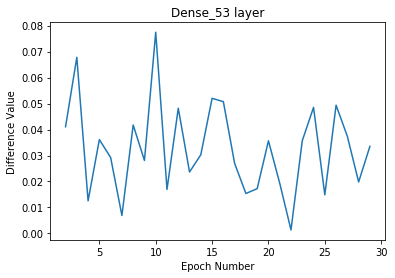

In [17]:
epoch_number=np.arange(2,30,1)
plt.xlabel('Epoch Number')
plt.ylabel('Difference Value')
plt.plot(epoch_number,mat_4)
plt.title('Dense_53 layer')
plt.savefig('./Graphs/weights_variation_53_less_epoch_seed.svg',format='svg',dpi=1200)

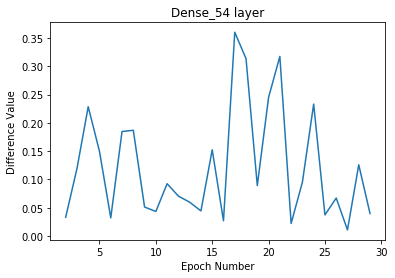

In [18]:
epoch_number=np.arange(2,30,1)
plt.xlabel('Epoch Number')
plt.ylabel('Difference Value')
plt.plot(epoch_number,mat_6)
plt.title('Dense_54 layer')
plt.savefig('./Graphs/weights_variation_54_less_epoch_seed.svg',format='svg',dpi=1200)